### Libraries import

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Style

In [3]:
from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')

### Data import

In [4]:
dataset_per_titolo_studio = pd.read_csv('./../data/fenomeno/stereotipi/Cosa si consiglierebbe a una donna che ha subito violenza dal compagno (2018).csv')
dataset_per_età = pd.read_csv('./../data/fenomeno/stereotipi/Cosa si consiglierebbe a una donna che ha subito violenza dal compagno - 2 (2018).csv')

dataset_per_titolo_studio, dataset_per_età

(    ITTER107 Territorio TIPO_DATO_VIOLENZA  \
 0         IT     Italia      P18_74_OPDOKN   
 1         IT     Italia      P18_74_OPDOKN   
 2         IT     Italia      P18_74_OPDOKN   
 3         IT     Italia      P18_74_OPDOKN   
 4         IT     Italia      P18_74_OPDOKN   
 ..       ...        ...                ...   
 130       IT     Italia      P18_74_OPDOKN   
 131       IT     Italia      P18_74_OPDOKN   
 132       IT     Italia      P18_74_OPDOKN   
 133       IT     Italia      P18_74_OPDOKN   
 134       IT     Italia      P18_74_OPDOKN   
 
                                              Tipo dato SEXISTAT1    Sesso  \
 0    persone di 18-74 anni per opinioni su cosa far...         M   maschi   
 1    persone di 18-74 anni per opinioni su cosa far...         F  femmine   
 2    persone di 18-74 anni per opinioni su cosa far...         T   totale   
 3    persone di 18-74 anni per opinioni su cosa far...         M   maschi   
 4    persone di 18-74 anni per opinioni su 

Pulizia dei dati (rimozione campi inutili):

In [5]:
# rimuovo le colonne:
# - "TIME" e "Seleziona periodo" in quanto i dati sono esclusivamente del 2018
# - "ITTER107" e "Territorio" in quanto i dati sono solo a livello nazionale e non vi è distinzione regionale
# - "Flag Codes" e "Flags" in quanto semplicemente inutili
# - "Tipo dato" e "TIPO_DATO_VIOLENZA" in quanto il dato è sempre di persone tra i 18 e i 74 anni, nel caso del dataset_per_età
#   è poi specializzato in altri campi
drop_column_names = ['TIME', 'Seleziona periodo', 'Territorio', 'ITTER107', 'Flag Codes', 'Flags', 'Tipo dato', 'TIPO_DATO_VIOLENZA']
dataset_per_titolo_studio = dataset_per_titolo_studio.drop(columns=drop_column_names)
dataset_per_età = dataset_per_età.drop(columns=drop_column_names)

dataset_per_titolo_studio.columns, dataset_per_età.columns

(Index(['SEXISTAT1', 'Sesso', 'TITOLO_STUDIO', 'Titolo di studio', 'OPINIONI_C',
        'Consigli', 'Value'],
       dtype='object'),
 Index(['SEXISTAT1', 'Sesso', 'ETA1', 'Classe di età', 'OPINIONI_C', 'Consigli',
        'Value'],
       dtype='object'))

Rimozione dell'aggregatore di tutti i titoli di studio:

In [6]:
all_genders_per_titolo_studio = dataset_per_titolo_studio[(dataset_per_titolo_studio['SEXISTAT1'] != 'T')
                                                          & (dataset_per_titolo_studio['OPINIONI_C'] == 'KNDOADV')
                                                          & (dataset_per_titolo_studio['TITOLO_STUDIO'] != 'ALL')]
all_genders_per_titolo_studio

,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,OPINIONI_C,Consigli,Value
99,M,maschi,USE_IF,diploma di istruzione secondaria di II grado o...,KNDOADV,non saprebbe cosa fare/consigliare,1.7
100,M,maschi,NP,"licenza di scuola elementare, nessun titolo di...",KNDOADV,non saprebbe cosa fare/consigliare,7.0
101,M,maschi,LSE,licenza di scuola media inferiore o di avviame...,KNDOADV,non saprebbe cosa fare/consigliare,4.4
102,M,maschi,CLF_ML,laurea o diploma universitario,KNDOADV,non saprebbe cosa fare/consigliare,0.9
103,F,femmine,USE_IF,diploma di istruzione secondaria di II grado o...,KNDOADV,non saprebbe cosa fare/consigliare,1.2
104,F,femmine,NP,"licenza di scuola elementare, nessun titolo di...",KNDOADV,non saprebbe cosa fare/consigliare,6.9
105,F,femmine,LSE,licenza di scuola media inferiore o di avviame...,KNDOADV,non saprebbe cosa fare/consigliare,2.6
106,F,femmine,CLF_ML,laurea o diploma universitario,KNDOADV,non saprebbe cosa fare/consigliare,0.8


Rinominazione "Titoli di studio":

In [7]:
all_genders_per_titolo_studio.loc[all_genders_per_titolo_studio['TITOLO_STUDIO'] == 'CLF_ML', 'Titolo di studio'] = "Laurea"
all_genders_per_titolo_studio.loc[all_genders_per_titolo_studio['TITOLO_STUDIO'] == 'NP', 'Titolo di studio'] = "Scuola elementare / Nessun titolo"
all_genders_per_titolo_studio.loc[all_genders_per_titolo_studio['TITOLO_STUDIO'] == 'LSE', 'Titolo di studio'] = "Scuola media"
all_genders_per_titolo_studio.loc[all_genders_per_titolo_studio['TITOLO_STUDIO'] == 'USE_IF', 'Titolo di studio'] = "Istruzione secondaria di II grado"
all_genders_per_titolo_studio

,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,OPINIONI_C,Consigli,Value
99,M,maschi,USE_IF,Istruzione secondaria di II grado,KNDOADV,non saprebbe cosa fare/consigliare,1.7
100,M,maschi,NP,Scuola elementare / Nessun titolo,KNDOADV,non saprebbe cosa fare/consigliare,7.0
101,M,maschi,LSE,Scuola media,KNDOADV,non saprebbe cosa fare/consigliare,4.4
102,M,maschi,CLF_ML,Laurea,KNDOADV,non saprebbe cosa fare/consigliare,0.9
103,F,femmine,USE_IF,Istruzione secondaria di II grado,KNDOADV,non saprebbe cosa fare/consigliare,1.2
104,F,femmine,NP,Scuola elementare / Nessun titolo,KNDOADV,non saprebbe cosa fare/consigliare,6.9
105,F,femmine,LSE,Scuola media,KNDOADV,non saprebbe cosa fare/consigliare,2.6
106,F,femmine,CLF_ML,Laurea,KNDOADV,non saprebbe cosa fare/consigliare,0.8


Separazione dei dati per uomini e donne:

In [8]:
males_per_titolo_studio = all_genders_per_titolo_studio[all_genders_per_titolo_studio['SEXISTAT1'] == 'M']
males_per_titolo_studio

,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,OPINIONI_C,Consigli,Value
99,M,maschi,USE_IF,Istruzione secondaria di II grado,KNDOADV,non saprebbe cosa fare/consigliare,1.7
100,M,maschi,NP,Scuola elementare / Nessun titolo,KNDOADV,non saprebbe cosa fare/consigliare,7.0
101,M,maschi,LSE,Scuola media,KNDOADV,non saprebbe cosa fare/consigliare,4.4
102,M,maschi,CLF_ML,Laurea,KNDOADV,non saprebbe cosa fare/consigliare,0.9


In [9]:
females_per_titolo_studio = all_genders_per_titolo_studio[all_genders_per_titolo_studio['SEXISTAT1'] == 'F']
females_per_titolo_studio

,SEXISTAT1,Sesso,TITOLO_STUDIO,Titolo di studio,OPINIONI_C,Consigli,Value
103,F,femmine,USE_IF,Istruzione secondaria di II grado,KNDOADV,non saprebbe cosa fare/consigliare,1.2
104,F,femmine,NP,Scuola elementare / Nessun titolo,KNDOADV,non saprebbe cosa fare/consigliare,6.9
105,F,femmine,LSE,Scuola media,KNDOADV,non saprebbe cosa fare/consigliare,2.6
106,F,femmine,CLF_ML,Laurea,KNDOADV,non saprebbe cosa fare/consigliare,0.8


In [10]:
all_genders_per_età = dataset_per_età[(dataset_per_età['SEXISTAT1'] != 'T') & (dataset_per_età['OPINIONI_C'] == 'KNDOADV')
                                      & (dataset_per_età['ETA1'] != 'TOTAL')]

all_genders_per_età

,SEXISTAT1,Sesso,ETA1,Classe di età,OPINIONI_C,Consigli,Value
18,M,maschi,Y30-44,30-44 anni,KNDOADV,non saprebbe cosa fare/consigliare,1.9
19,F,femmine,Y30-44,30-44 anni,KNDOADV,non saprebbe cosa fare/consigliare,1.2
72,M,maschi,Y18-29,18-29 anni,KNDOADV,non saprebbe cosa fare/consigliare,1.2
73,F,femmine,Y18-29,18-29 anni,KNDOADV,non saprebbe cosa fare/consigliare,0.8
99,M,maschi,Y45-59,45-59 anni,KNDOADV,non saprebbe cosa fare/consigliare,3.1
100,F,femmine,Y45-59,45-59 anni,KNDOADV,non saprebbe cosa fare/consigliare,2.0
126,M,maschi,Y60-74,60-74 anni,KNDOADV,non saprebbe cosa fare/consigliare,5.0
127,F,femmine,Y60-74,60-74 anni,KNDOADV,non saprebbe cosa fare/consigliare,4.6


In [11]:
males_per_età = all_genders_per_età[all_genders_per_età['SEXISTAT1'] == 'M']
males_per_età

,SEXISTAT1,Sesso,ETA1,Classe di età,OPINIONI_C,Consigli,Value
18,M,maschi,Y30-44,30-44 anni,KNDOADV,non saprebbe cosa fare/consigliare,1.9
72,M,maschi,Y18-29,18-29 anni,KNDOADV,non saprebbe cosa fare/consigliare,1.2
99,M,maschi,Y45-59,45-59 anni,KNDOADV,non saprebbe cosa fare/consigliare,3.1
126,M,maschi,Y60-74,60-74 anni,KNDOADV,non saprebbe cosa fare/consigliare,5.0


In [12]:
females_per_età = all_genders_per_età[all_genders_per_età['SEXISTAT1'] == 'F']
females_per_età

,SEXISTAT1,Sesso,ETA1,Classe di età,OPINIONI_C,Consigli,Value
19,F,femmine,Y30-44,30-44 anni,KNDOADV,non saprebbe cosa fare/consigliare,1.2
73,F,femmine,Y18-29,18-29 anni,KNDOADV,non saprebbe cosa fare/consigliare,0.8
100,F,femmine,Y45-59,45-59 anni,KNDOADV,non saprebbe cosa fare/consigliare,2.0
127,F,femmine,Y60-74,60-74 anni,KNDOADV,non saprebbe cosa fare/consigliare,4.6


Ordinamento dei dati:

In [13]:
titolo_di_studio_custom_order = {'NP': 0, 'LSE': 1, 'USE_IF': 2, 'CLF_ML': 3} 
males_per_titolo_studio = males_per_titolo_studio.sort_values(by=['TITOLO_STUDIO'], key=lambda x: x.map(titolo_di_studio_custom_order))
females_per_titolo_studio = females_per_titolo_studio.sort_values(by=['TITOLO_STUDIO'], key=lambda x: x.map(titolo_di_studio_custom_order))

In [14]:
età_custom_order = {'Y30-44': 1, 'Y18-29': 0, 'Y45-59': 2, 'Y60-74	': 3}
males_per_età = males_per_età.sort_values(by=['ETA1'], key=lambda x: x.map(età_custom_order))
females_per_età = females_per_età.sort_values(by=['ETA1'], key=lambda x: x.map(età_custom_order))

### Plot

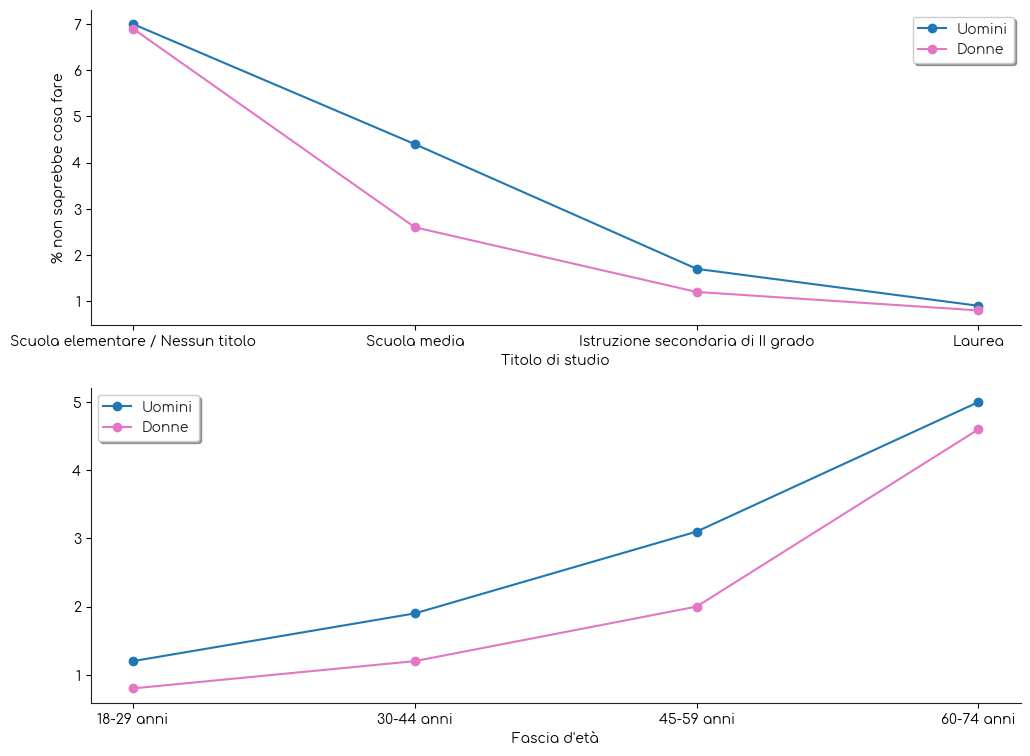

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(12,9))

axs[0].plot(males_per_titolo_studio['Titolo di studio'], males_per_titolo_studio['Value'], color='#1F77B4', marker="o")
axs[0].plot(males_per_titolo_studio['Titolo di studio'].drop_duplicates(), females_per_titolo_studio['Value'], color='#E377C3', marker="o")
axs[0].legend(['Uomini', 'Donne'])
axs[0].set_xlabel('Titolo di studio')
axs[0].set_ylabel('% non saprebbe cosa fare')

# 45° labels
# for label in axs[0].get_xticklabels():
#   label.set_rotation(45)
#   label.set_ha('right')

# plt.plot(data, color='pink')
# plt.plot(data, 'o', color='pink')

axs[1].plot(males_per_età['Classe di età'].drop_duplicates(), males_per_età['Value'], color='#1F77B4', marker="o")
axs[1].plot(males_per_età['Classe di età'].drop_duplicates(), females_per_età['Value'], color='#E377C3', marker="o")
# axs[1].stackplot(all_genders_per_età['Classe di età'].drop_duplicates(), y_axis_data, colors=['#1F77B4', '#E377C3'])
axs[1].legend(['Uomini', 'Donne'])
axs[1].set_xlabel('Fascia d\'età')

plt.show()

Separati:

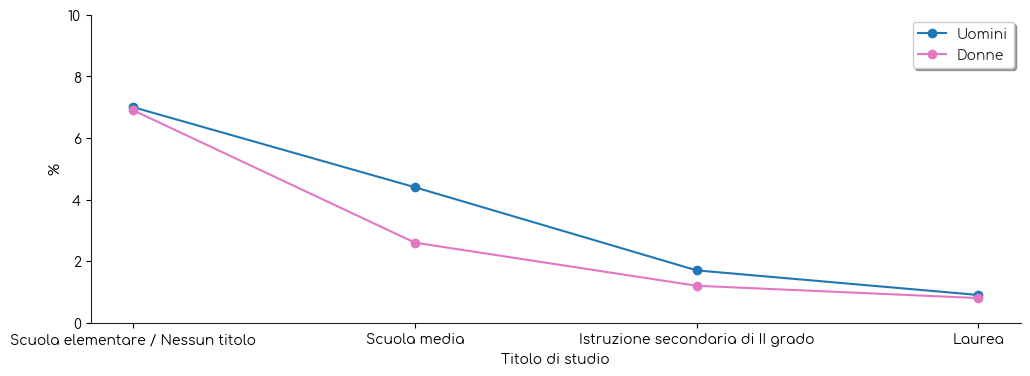

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(12,4))

axs.plot(males_per_titolo_studio['Titolo di studio'], males_per_titolo_studio['Value'], color='#1F77B4', marker="o")
axs.plot(males_per_titolo_studio['Titolo di studio'].drop_duplicates(), females_per_titolo_studio['Value'], color='#E377C3', marker="o")
axs.legend(['Uomini', 'Donne'])
axs.set_xlabel('Titolo di studio')
axs.set_ylabel('%')
axs.set_ylim(0, 10)

plt.show()

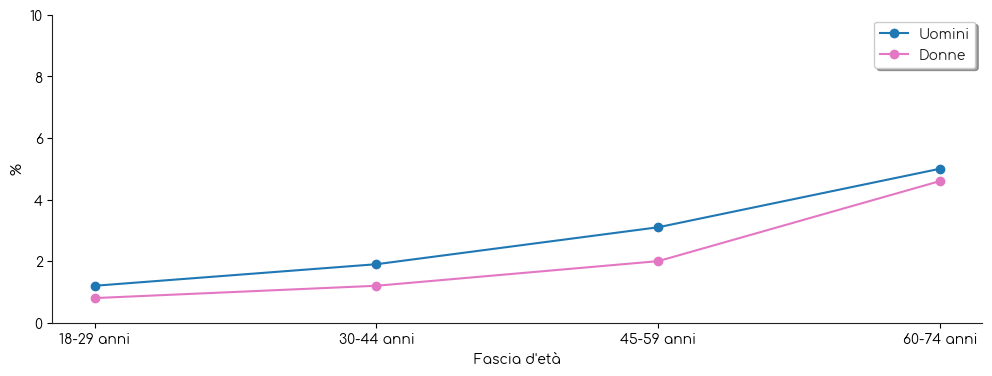

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(12,4))

axs.plot(males_per_età['Classe di età'].drop_duplicates(), males_per_età['Value'], color='#1F77B4', marker="o")
axs.plot(males_per_età['Classe di età'].drop_duplicates(), females_per_età['Value'], color='#E377C3', marker="o")
axs.legend(['Uomini', 'Donne'])
axs.set_xlabel('Fascia d\'età')
axs.set_ylabel('%')
axs.set_ylim(0, 10)

plt.show()

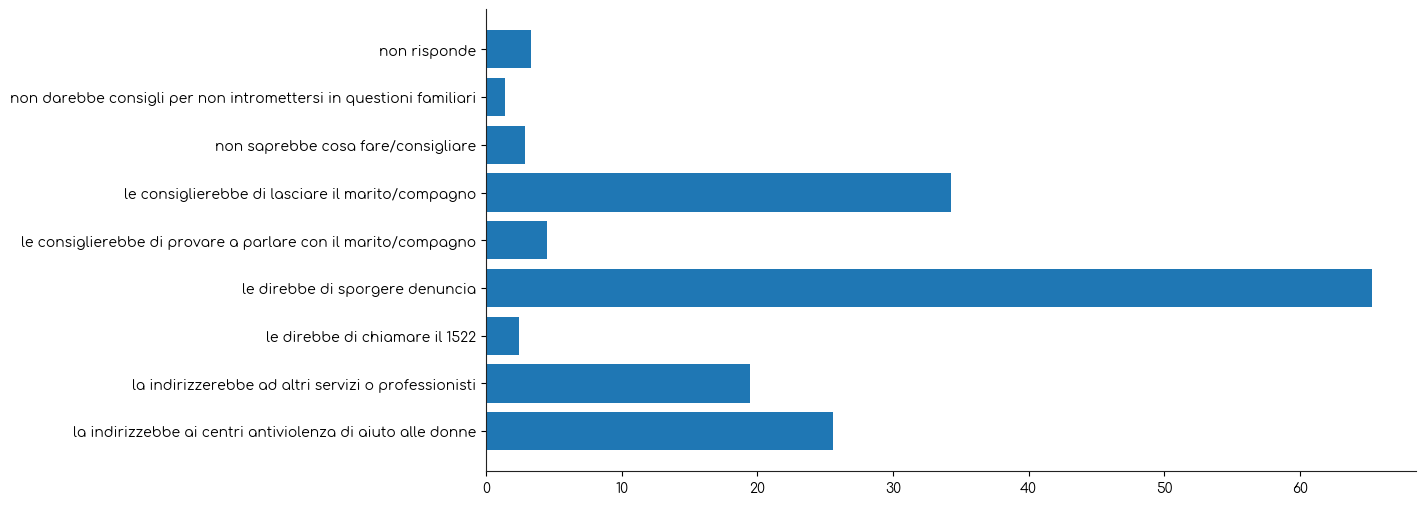

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(12,6))

all = dataset_per_età[(dataset_per_età['ETA1'] == 'TOTAL')]
all = all.iloc[:, 4:]
plt.barh(all['Consigli'], all['Value'])

plt.show()